# 1. Importação das Bibliotecas

Utilizamos pandas para manipulação de dados, numpy para operações matemáticas, matplotlib e seaborn para visualização gráfica, e scikit-learn para o modelo.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import os
from sklearn.svm import SVC
import kagglehub


c:\Users\ediad\OneDrive\Área de Trabalho\Machine-Learning\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 2. Carregamento do Dataset
O dataset utilizado contém informações sobre desempenho de estudantes em exames.

In [2]:

# Baixar o dataset do Kaggle
path = kagglehub.dataset_download("spscientist/students-performance-in-exams")
print("Path to dataset files:", path)

# Carregar o arquivo CSV
csv_path = path + "/StudentsPerformance.csv"
df = pd.read_csv(csv_path)
df.head()

Path to dataset files: C:\Users\ediad\.cache\kagglehub\datasets\spscientist\students-performance-in-exams\versions\1


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## 3. Exploração dos Dados
Realize uma análise inicial do conjunto de dados, incluindo visualizações e estatísticas descritivas.

In [3]:
# Estatísticas descritivas
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

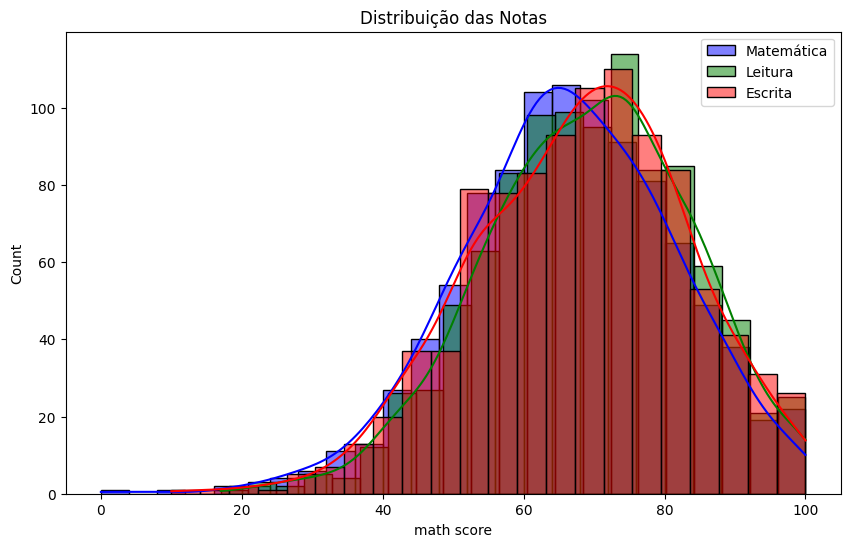

In [4]:
# Visualização das distribuições das notas
plt.figure(figsize=(10,6))
sns.histplot(df['math score'], kde=True, color='blue', label='Matemática')
sns.histplot(df['reading score'], kde=True, color='green', label='Leitura')
sns.histplot(df['writing score'], kde=True, color='red', label='Escrita')
plt.legend()
plt.title('Distribuição das Notas')
plt.savefig('imagens/distribuicao_notas.png')
plt.show()

## 4. Pré-processamento
Nesta etapa, vamos tratar valores ausentes, codificar variáveis categóricas e normalizar os dados.

In [5]:
# Remover valores ausentes (se houver)
df = df.dropna()

# Codificar variáveis categóricas
df_encoded = pd.get_dummies(df, drop_first=True)

# Normalizar as variáveis numéricas
scaler = StandardScaler()
scores = ['math score', 'reading score', 'writing score']
df_encoded[scores] = scaler.fit_transform(df_encoded[scores])
df_encoded.head()

,math score,reading score,writing score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,0.390024,0.193999,0.391492,False,True,False,False,False,True,False,False,False,False,True,True
1,0.192076,1.427476,1.313269,False,False,True,False,False,False,False,False,True,False,True,False
2,1.577711,1.770109,1.642475,False,True,False,False,False,False,False,True,False,False,True,True
3,-1.259543,-0.833899,-1.583744,True,False,False,False,False,False,False,False,False,False,False,True
4,0.653954,0.605158,0.457333,True,False,True,False,False,False,False,False,True,False,True,True


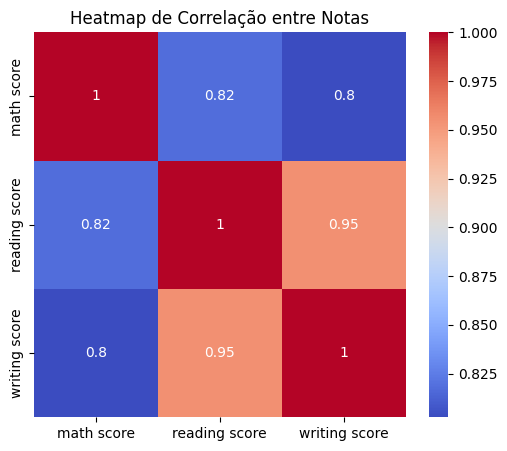

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Calcula a matriz de correlação entre as notas
corr = df[['math score', 'reading score', 'writing score']].corr()

# Cria o diretório de imagens se não existir
os.makedirs('imagens', exist_ok=True)
# Gera o heatmap
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Heatmap de Correlação entre Notas')
plt.savefig('imagens/heatmap_correlacao_notas.png')
plt.show()

C:\Users\ediad\AppData\Local\Temp\ipykernel_13192\3817415673.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='gender', y='math score', data=df, ci=None, ax=ax)


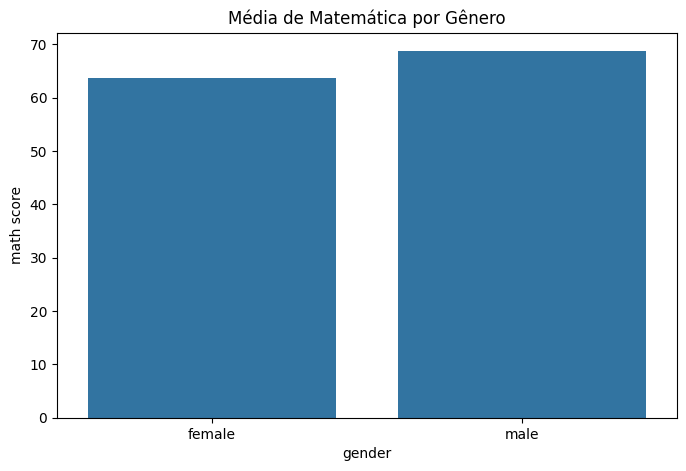

C:\Users\ediad\AppData\Local\Temp\ipykernel_13192\3817415673.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='race/ethnicity', y='math score', data=df, ci=None, ax=ax)


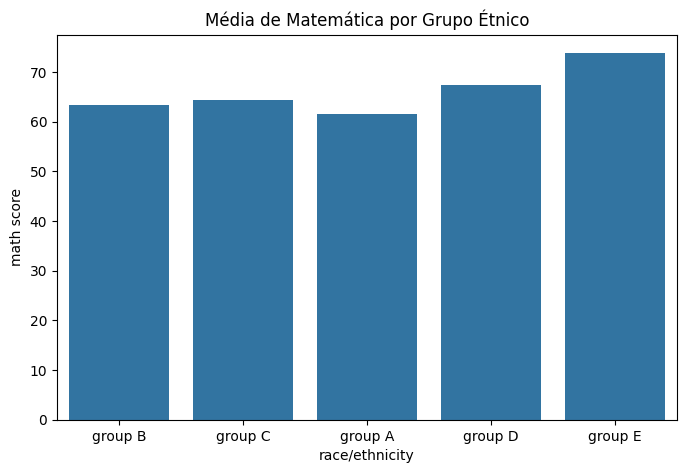

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.makedirs('imagens', exist_ok=True)

# Comparação por gênero
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(x='gender', y='math score', data=df, ci=None, ax=ax)
plt.title('Média de Matemática por Gênero')
plt.savefig('imagens/barplot_genero.png')
plt.show()

# Comparação por grupo étnico
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(x='race/ethnicity', y='math score', data=df, ci=None, ax=ax)
plt.title('Média de Matemática por Grupo Étnico')
plt.savefig('imagens/barplot_etnia.png')
plt.show()

## 5. Divisão dos Dados
Agora, separamos o conjunto de dados em treino e teste.

In [6]:
# Definir variável alvo e preditoras
X = df_encoded.drop('math score', axis=1)  # Exemplo: usando 'math score' como alvo
y = df_encoded['math score'] > 0  # Classificação binária: notas acima da média
y = y.astype(int)

# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 6. Treinamento do Modelo SVM
Vamos treinar o modelo SVM com os dados de treino.

In [7]:

# Treinamento do modelo SVM
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


## 7. Avaliação do Modelo
Avalie o desempenho do modelo SVM utilizando métricas apropriadas.

In [8]:
# Avaliação do modelo SVM
y_pred = svm.predict(X_test)
print('Acurácia:', accuracy_score(y_test, y_pred))
print('Relatório de Classificação:')
print(classification_report(y_test, y_pred))
print('Matriz de Confusão:')
print(confusion_matrix(y_test, y_pred))

Acurácia: 0.895
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       104
           1       0.90      0.88      0.89        96

    accuracy                           0.90       200
   macro avg       0.90      0.89      0.89       200
weighted avg       0.90      0.90      0.89       200

Matriz de Confusão:
[[95  9]
 [12 84]]


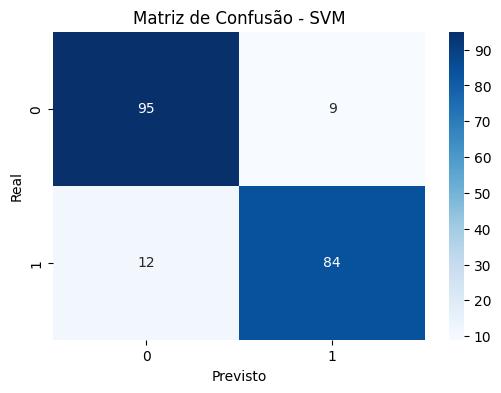

In [9]:
# Visualização da matriz de confusão
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão - SVM')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.savefig('imagens/matriz_confusao_svm.png')
plt.show()